In [32]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Specifying an alternative encoding
df = pd.read_csv('MERGED_FOOD_DATA_WITH_GRAMS.csv')

In [6]:
#checking top 5 rows of dataset
df.head()

,Unnamed: 0.1,food,serving_size,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Category
0,0,cream cheese,100 grams,51,5.0,2.9,1.3,0.200,0.8,0.500,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,Dairy
1,1,neufchatel cheese,100 grams,215,19.4,10.9,4.9,0.800,3.1,2.700,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,Dairy
2,2,requeijao cremoso light catupiry,100 grams,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Other
3,3,ricotta cheese,100 grams,30,2.0,1.3,0.5,0.002,1.5,0.091,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Dairy
4,4,cream cheese low fat,100 grams,30,2.3,1.4,0.6,0.042,1.2,0.900,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Dairy


In [7]:
#checking bottom 5 rows of dataset
df.tail()

,Unnamed: 0.1,food,serving_size,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Category
2390,717,jews ear,100 grams,25,0.095,0.000,0.000,0.000,6.7,0.000,...,0.4,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249,Other
2391,718,enoki mushrooms,100 grams,1,0.099,0.027,0.000,0.010,0.2,0.034,...,0.0,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433,Other
2392,719,morel mushrooms,100 grams,4,0.070,0.056,0.031,0.007,0.7,0.096,...,5.5,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727,Other
2393,720,portabella mushrooms raw,100 grams,19,0.300,0.036,0.016,0.100,3.3,2.200,...,0.2,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400,Other
2394,721,oyster mushroom,100 grams,5,0.035,0.016,0.039,0.099,0.9,0.200,...,0.5,0.008,0.200,2.700,0.055,18.0,63.000,0.048,1.804,Other


In [8]:
#checking shape of dataset
df.shape

(2395, 38)

In [9]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2395 non-null   int64  
 1   food                  2395 non-null   object 
 2   serving_size          2395 non-null   object 
 3   Caloric Value         2395 non-null   int64  
 4   Fat                   2395 non-null   float64
 5   Saturated Fats        2395 non-null   float64
 6   Monounsaturated Fats  2395 non-null   float64
 7   Polyunsaturated Fats  2395 non-null   float64
 8   Carbohydrates         2395 non-null   float64
 9   Sugars                2395 non-null   float64
 10  Protein               2395 non-null   float64
 11  Dietary Fiber         2395 non-null   float64
 12  Cholesterol           2395 non-null   float64
 13  Sodium                2395 non-null   float64
 14  Water                 2395 non-null   float64
 15  Vitamin A            

In [10]:
#dropping null values
df.dropna(inplace=True)

In [11]:
#checking for missing values
df.isnull().sum()

Unnamed: 0.1            0
food                    0
serving_size            0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
Category                0
dtype: int64

In [12]:
#checking shape
df.shape

(2395, 38)

In [34]:
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


EDA Analysis

In [33]:
# Identifying Outliers using Z-Score Method
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_cols].apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
outlier_counts = outliers.sum()
print("\nOutlier Counts Per Column (Z-Score > 3 or < -3):")
print(outlier_counts)


Outlier Counts Per Column (Z-Score > 3 or < -3):
Unnamed: 0.1             0
Caloric Value           32
Fat                     28
Saturated Fats          17
Monounsaturated Fats    28
Polyunsaturated Fats    36
Carbohydrates           77
Sugars                  41
Protein                 23
Dietary Fiber           39
Cholesterol             16
Sodium                   7
Water                   27
Vitamin A               12
Vitamin B1              15
Vitamin B11              2
Vitamin B12              1
Vitamin B2              13
Vitamin B3              42
Vitamin B5              30
Vitamin B6              35
Vitamin C                5
Vitamin D               39
Vitamin E               37
Vitamin K                2
Calcium                 43
Copper                  14
Iron                    26
Magnesium               56
Manganese               46
Phosphorus              29
Potassium               38
Selenium                58
Zinc                    29
Nutrition Density       46
dtype

In [13]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))



Descriptive Statistics:
        Unnamed: 0.1          food serving_size  Caloric Value          Fat  \
count    2395.000000          2395         2395    2395.000000  2395.000000   
unique           NaN          2395            1            NaN          NaN   
top              NaN  cream cheese    100 grams            NaN          NaN   
freq             NaN             1         2395            NaN          NaN   
mean      272.258038           NaN          NaN     223.769520    10.176276   
std       182.889214           NaN          NaN     384.728244    29.008915   
min         0.000000           NaN          NaN       0.000000     0.000000   
25%       119.000000           NaN          NaN      44.500000     0.300000   
50%       241.000000           NaN          NaN     117.000000     2.100000   
75%       414.500000           NaN          NaN     258.000000     9.400000   
max       721.000000           NaN          NaN    6077.000000   550.700000   

        Saturated Fats  Mo

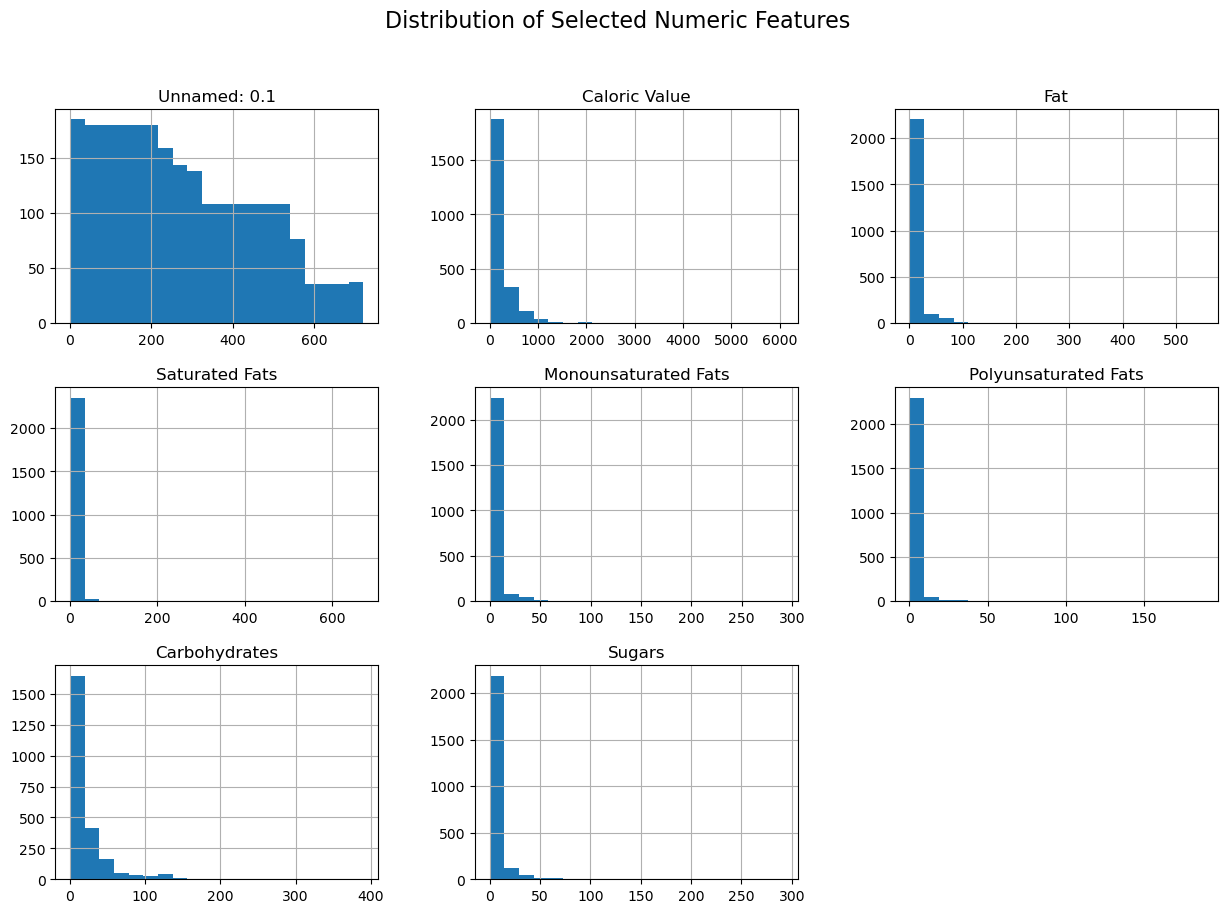

In [37]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
filtered_numeric_cols = numeric_cols[:8]  # Selecting a few for clarity
df[filtered_numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Selected Numeric Features', fontsize=16)
plt.show()

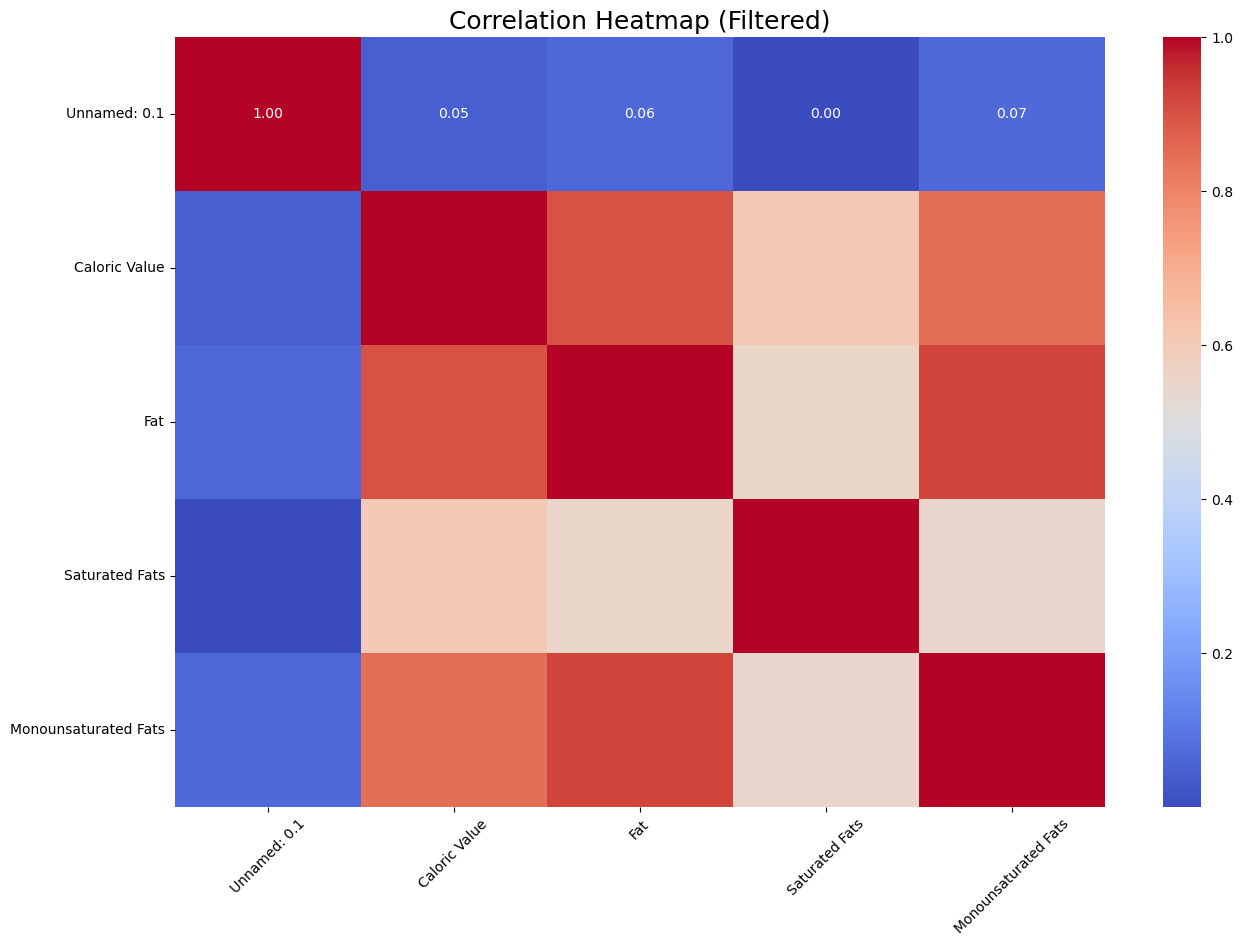

In [16]:
#Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[filtered_numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap (Filtered)', fontsize=18)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.show()

Preprocessing:

In [22]:
# Filling missing numeric values with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [24]:
# Filling missing categorical values with the mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [25]:
#Encoding Categorical Features
encoded_data = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nPreprocessed Dataset Shape:", encoded_data.shape)
print("\nPreprocessing Complete.")


Preprocessed Dataset Shape: (2395, 2437)

Preprocessing Complete.
